# SC1015  Data Science Project 
# Title: Heart Attack Analysis & Prediction
### Authors: Ghate Harshal Shrikant, Solis Aaron Mari Santos, Ethan Wong Kee Jann

## What will you learn from this project?
* EDA
* Missing Value Analysis
* Categoric and Numeric Features
* Standardization
* Box - Swarm - Cat - Correlation Plot Analysis
* Outlier Detection
* Modelling and Tuning Machine Learning Model 

## Introduction
* A heart attack, also called a myocardial infarction, happens when a part of the heart muscle doesn't get enough blood. 
* The more time that passes without treatment to restore blood flow, the greater the damage to the heart muscle. 
* Coronary artery disease (CAD) is the main cause of heart attack.

![hear.JPG](hear.JPG)

## Analysis Content
1. [Python Libraries](#1)
1. [Data Content](#2)
1. [Read and Analyse Data](#3)
1. [Missing Value Analysis](#4)
1. [Unique Value Analysis](#5)
1. [Categorical Feature Analysis](#6)
1. [Numeric Feature Analysis](#7)
1. [Standardization](#8)
1. [Box Plot Analysis](#9)
1. [Swarm Plot Analysis](#10)
1. [Cat Plot Analysis](#11)
1. [Correlation Analysis](#12)
1. [Outlier Detection](#13)
1. [Modelling](#14)
    1. Encoding Categorical Columns
    1. Scaling
    1. Train/Test Split
    1. Logistic Regression
    1. Logistic Regression Hyperparameter Tuning
1. [Conclusion](#15)

<a id="1"></a>
#### Python Libraries
* In this section, we import used libraries during this kernel.

In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

## Section 1: Data Preparation & Cleaning
* In this section, we read heart.csv and clean the dataset

First, we read our csv dataset into a pandas dataframe. <br>
We then inspect df.shape to see the number of rows and columns of the raw dataset. <br>
We see that there are, before any data processing, 303 rows and 14 columns.

In [77]:
df = pd.read_csv("heart2.csv")

print("Number of rows: ",df.shape[0])
print("\nNumber of columns: ", df.shape[1])

Number of rows:  303

Number of columns:  14


Next, we use df.head() to see the columns.

Response variable: output 
Numeric predictors: 
Categorical predictors: 

In [78]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [79]:
# describe basic statistics of data
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [80]:
# information about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<a id="4"></a>
#### Missing Value Analysis
The missing value analysis indicates that the dataset is complete with zero missing entries across all features, ensuring robustness for subsequent processing stages.

In [81]:
# missing value
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### Data Cleaning
We will start by removing NaN rows and duplicate rows 

In [82]:
DATA CLEANING CODE

SyntaxError: invalid syntax (45485783.py, line 1)

## Section 2: Exploratory Data Analysis

## 2a: Numeric EDA
1. Univariate non-graphical
2. Univariate graphical
3. Multivariate graphical & nongraphical

1. **Univariate Non-graphical** <br>
For this section, we look at the statistical insights of our various numerical data types including the response variable. <br>
This is primarily to check for outliers by comparing the max/min against median for respective columns.

In [83]:
numeric_data = pd.DataFrame(df)
numeric_data.describe().round(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


Furthermore, we examine the skewness and kurtosis of each numeric dataset.<br><br>
Skewness indicates the skewing of the distribution, with negative values suggesting a left skew and positive values indicating a right skew, while a skewness of 0 represents a normal distribution. A skewness below -1 or above 1 signifies heavy skewing.<br><br>
Kurtosis indicates the presence of outliers in the distribution. <br><br>
A kurtosis of 3 denotes a normal distribution, with values higher than 3 indicating more outliers towards the extreme ends and values lower than 3 suggesting fewer outliers than expected.

In [84]:
lst = []
for col in numeric_data:
    print(col, '\n')
    sk = numeric_data[col].astype(float).skew()
    kt = numeric_data[col].astype(float).kurt()
    print("Skewness: ", round(sk, 4), "\n")
    print("Kurtosis: ", round(kt, 4), "\n\n")
    lst.append(sk)
    lst.append(kt)
lst

age 

Skewness:  -0.2025 

Kurtosis:  -0.5422 


sex 

Skewness:  -0.7913 

Kurtosis:  -1.383 


cp 

Skewness:  0.4847 

Kurtosis:  -1.1931 


trtbps 

Skewness:  0.7138 

Kurtosis:  0.9291 


chol 

Skewness:  1.1434 

Kurtosis:  4.5054 


fbs 

Skewness:  1.9867 

Kurtosis:  1.9597 


restecg 

Skewness:  0.1625 

Kurtosis:  -1.3627 


thalachh 

Skewness:  -0.5374 

Kurtosis:  -0.062 


exng 

Skewness:  0.7425 

Kurtosis:  -1.4583 


oldpeak 

Skewness:  1.2697 

Kurtosis:  1.5758 


slp 

Skewness:  -0.5083 

Kurtosis:  -0.6275 


caa 

Skewness:  1.3104 

Kurtosis:  0.8393 


thall 

Skewness:  -0.4767 

Kurtosis:  0.2979 


output 

Skewness:  -0.1798 

Kurtosis:  -1.9808 




[-0.2024633654856539,
 -0.5421671409908408,
 -0.791335191480832,
 -1.3829609835171006,
 0.48473236883889675,
 -1.1930709803257231,
 0.7137684379181465,
 0.9290540528369715,
 1.1434008206693387,
 4.505423167753712,
 1.986651930914452,
 1.9596776292633504,
 0.16252224492761935,
 -1.3626733034314487,
 -0.5374096526832253,
 -0.06196993057611566,
 0.7425315444212832,
 -1.4583166825574485,
 1.269719930601997,
 1.5758130733382507,
 -0.5083156098165442,
 -0.6275207472668787,
 1.3104221354767875,
 0.8392531871665225,
 -0.47672219490975737,
 0.2979148532922311,
 -0.17982105403495655,
 -1.9807828625705264]

These Variabes Have Heavy Skew

Sex 

trtbps

chol

fbs

oldpeak

caa



We have created a custom function to remove the outliers.

In [85]:
def remove_outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1 
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in[(df[col] >= fence_low) & (df[col] <= fence_high)]
    return df_out

In [86]:
##remove the outliers 

 2. **Univariate Graphical** <br>
In this subsection, we explore the distributions and patterns of our numeric datatypes (age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall, output)

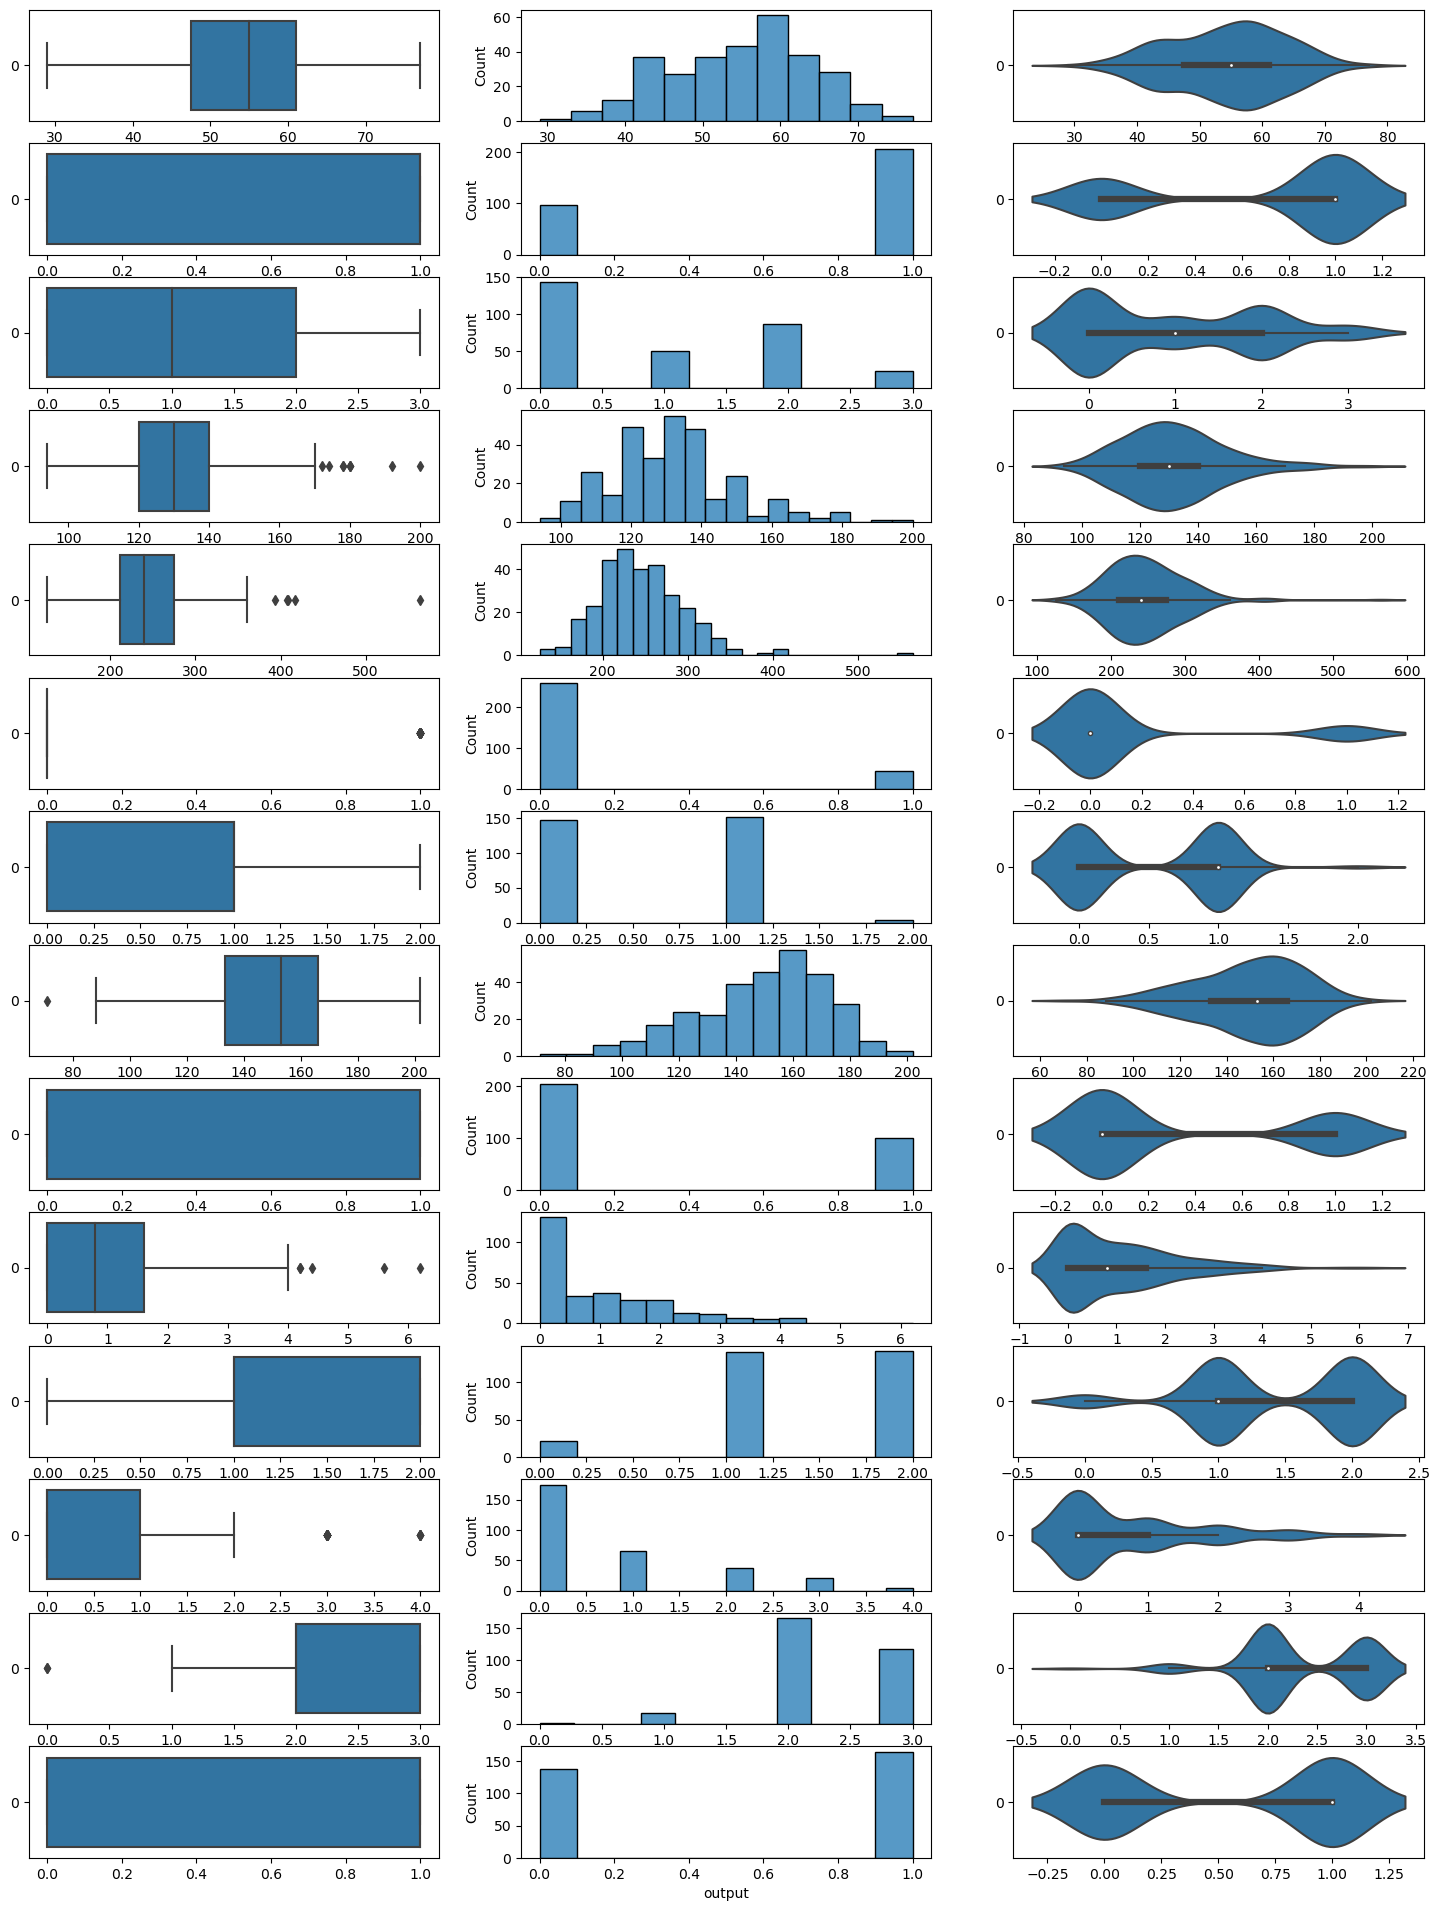

In [88]:
# Draw the distributions of all variables
f, axes = plt.subplots(14, 3, figsize=(18, 24))

count = 0
for var in numeric_data:
    sns.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    sns.histplot(data = numeric_data[var], ax = axes[count,1])
    sns.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2])
    count += 1

 3. **Multivariate Graphical/Nongraphical** <br>
Here we inspect the correlation between each pair of numeric variables.<br>
Our focus is of course, the first row (excluding first entry) enumerating the correlation coefficients for each of the predictors.

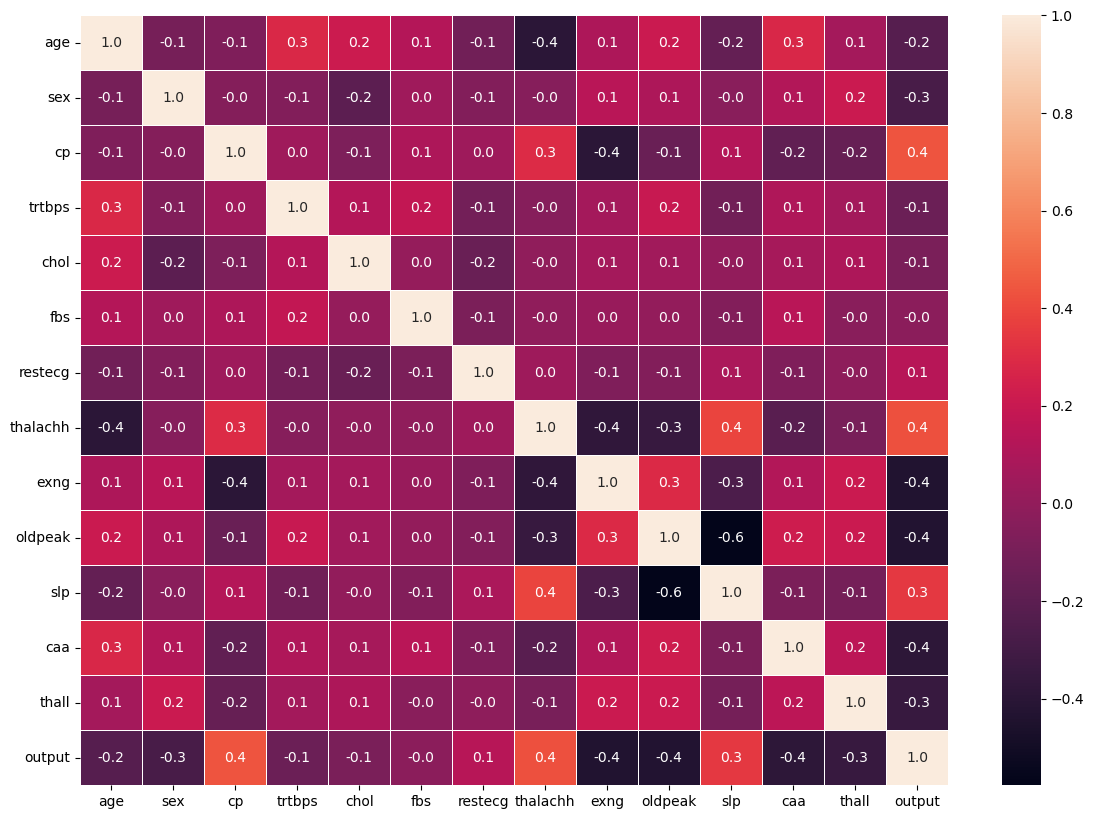

In [89]:
# Correlation Matrix


# Heatmap of the Correlation Matrix
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

We conclude from the heatmap the following:
1.
2. 
3. 

As such, we will primarily be using ____ for further numerical analysis.

### 2b. Categorical EDA
1. Univariate non-graphical
2. Univariate graphical
3. Multivariate graphical

1. **Univariate nongraphical** <br>
We inspect the numbers and proportions of each category in this section

2. **Univariate graphical** <br>
We inspect the visualised proportions using barplots, then the visualised distributions using boxplots.

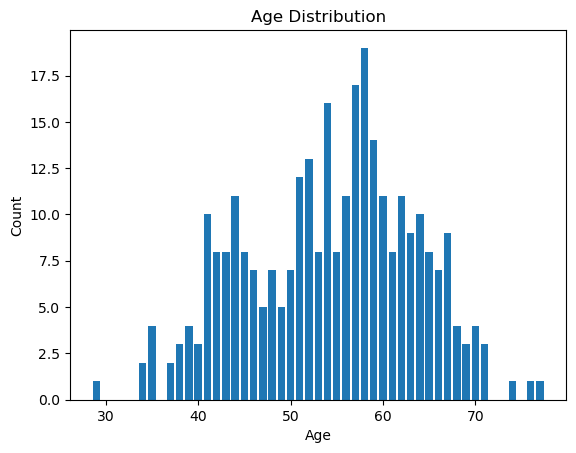

In [159]:
counts = df['age'].value_counts()

x_labels = counts.index
y_values = counts.values

plt.bar(x_labels, y_values)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')


plt.show()

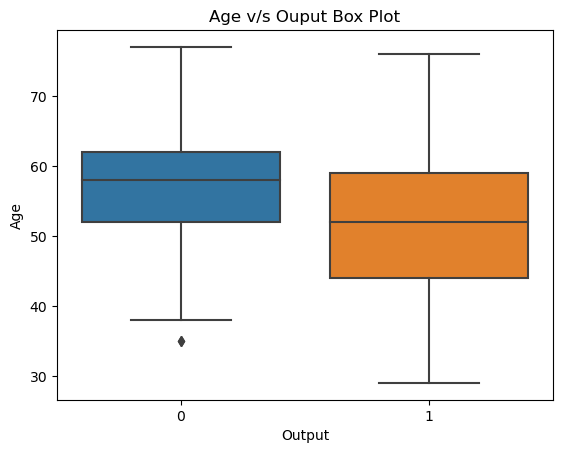

In [160]:
sns.boxplot(x='output', y='age', data=df)

# add x and y labels and a title
plt.xlabel('Output')
plt.ylabel('Age')
plt.title('Age v/s Ouput Box Plot')

# show the plot
plt.show()

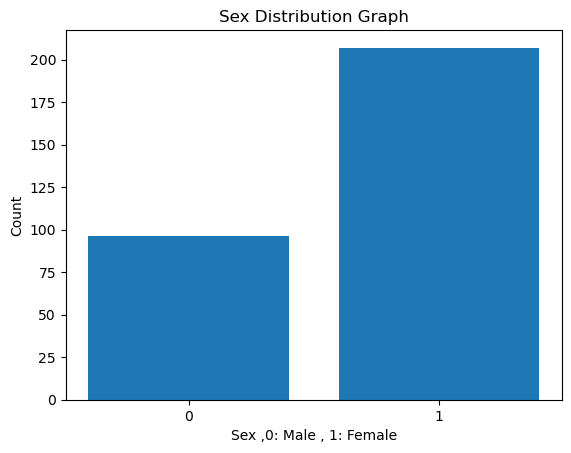

In [162]:
counts = df['sex'].value_counts()

x_labels = counts.index
y_values = counts.values

plt.bar(x_labels, y_values)

plt.xlabel('Sex ,0: Male , 1: Female')
plt.ylabel('Count')
plt.title('Sex Distribution Graph')

plt.xticks([0,1])
plt.show()

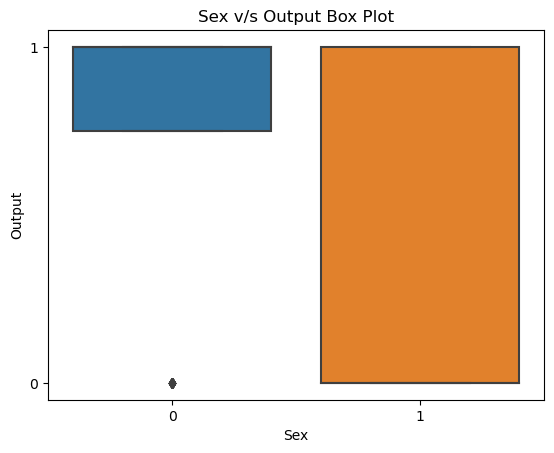

In [171]:
sns.boxplot(x='sex', y='output', data=df)

# add x and y labels and a title
plt.xlabel('Sex')
plt.ylabel('Output')
plt.title('Sex v/s Output Box Plot')
plt.xticks([0,1])
plt.yticks([0,1])
# show the plot
plt.show()

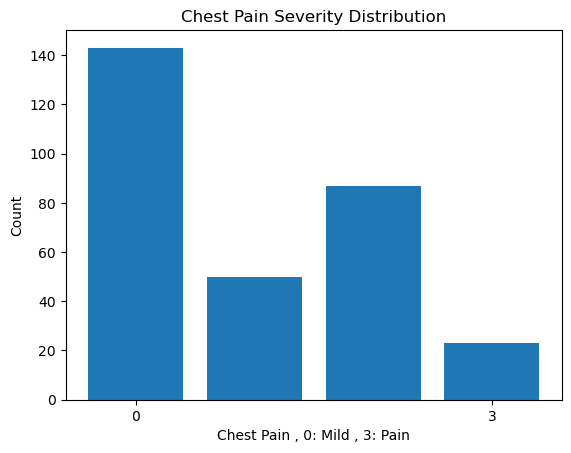

In [174]:
counts = df['cp'].value_counts()

x_labels = counts.index
y_values = counts.values

plt.bar(x_labels, y_values)

plt.xlabel('Chest Pain , 0: Mild , 3: Pain')
plt.ylabel('Count')
plt.title('Chest Pain Severity Distribution')
plt.xticks([0,3])

plt.show()

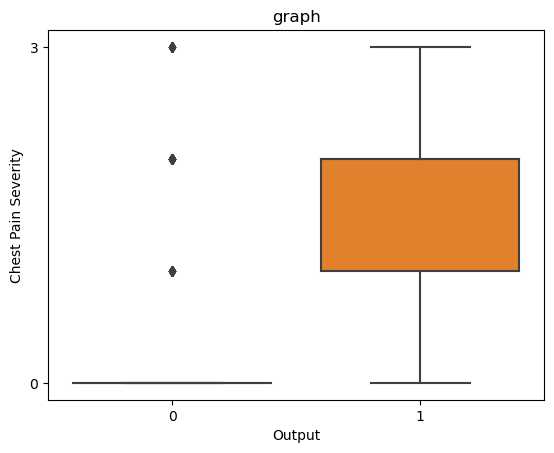

In [176]:
sns.boxplot(x='output', y='cp', data=df)

# add x and y labels and a title
plt.xlabel('Output')
plt.ylabel('Chest Pain Severity')
plt.title('graph')
plt.xticks([0,1])
plt.yticks([0,3])
# show the plot
plt.show()

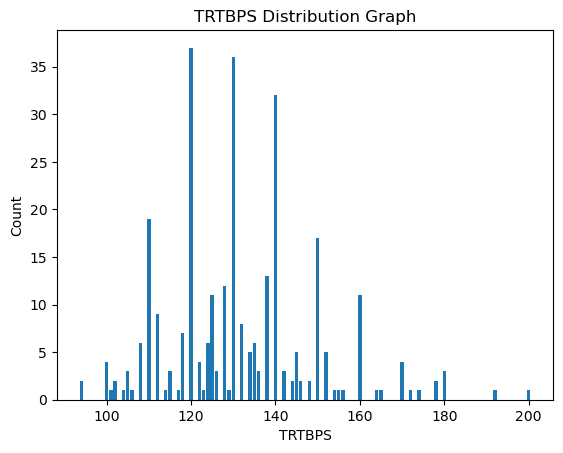

In [178]:
counts = df['trtbps'].value_counts()

x_labels = counts.index
y_values = counts.values

plt.bar(x_labels, y_values)

plt.xlabel('TRTBPS')
plt.ylabel('Count')
plt.title('TRTBPS Distribution Graph')


plt.show()

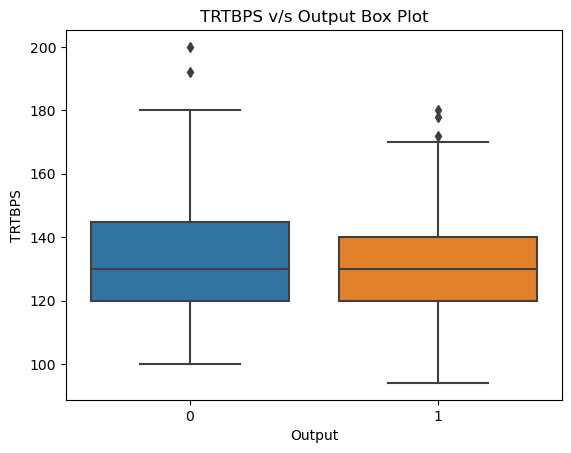

In [179]:
sns.boxplot(x='output', y='trtbps', data=df)

# add x and y labels and a title
plt.xlabel('Output')
plt.ylabel('TRTBPS')
plt.title('TRTBPS v/s Output Box Plot')


# show the plot
plt.show()

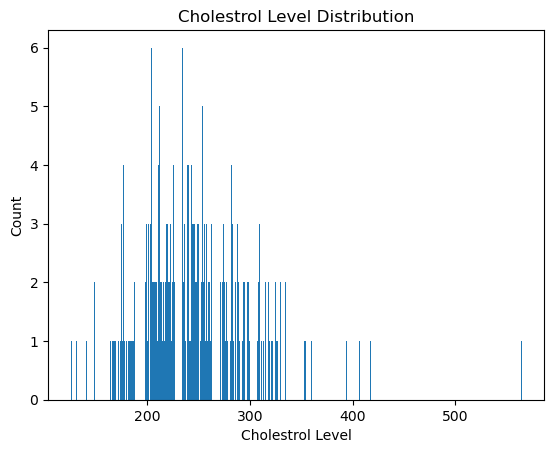

In [181]:
counts = df['chol'].value_counts()

x_labels = counts.index
y_values = counts.values

plt.bar(x_labels, y_values)

plt.xlabel('Cholestrol Level')
plt.ylabel('Count')
plt.title('Cholestrol Level Distribution')


plt.show()

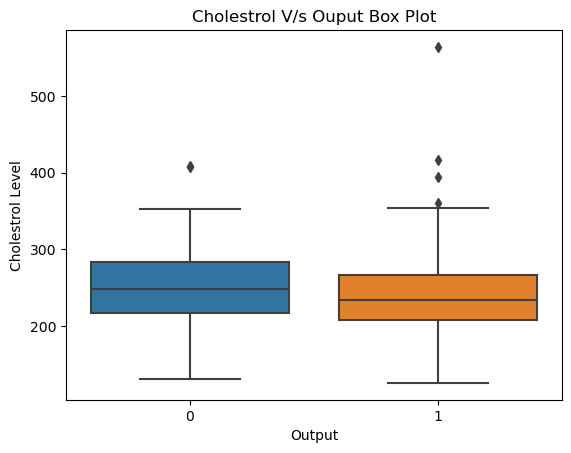

In [183]:
sns.boxplot(x='output', y='chol', data=df)

# add x and y labels and a title
plt.xlabel('Output')
plt.ylabel('Cholestrol Level')
plt.title('Cholestrol V/s Ouput Box Plot')

# show the plot
plt.show()

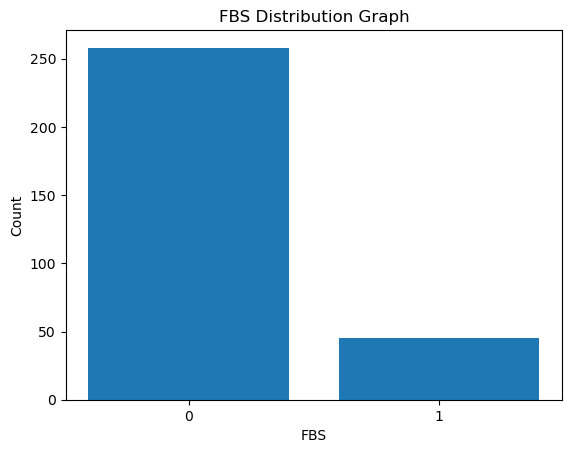

In [186]:
counts = df['fbs'].value_counts()

x_labels = counts.index
y_values = counts.values

plt.bar(x_labels, y_values)

plt.xlabel('FBS')
plt.ylabel('Count')
plt.title('FBS Distribution Graph')
plt.xticks([0,1])


plt.show()

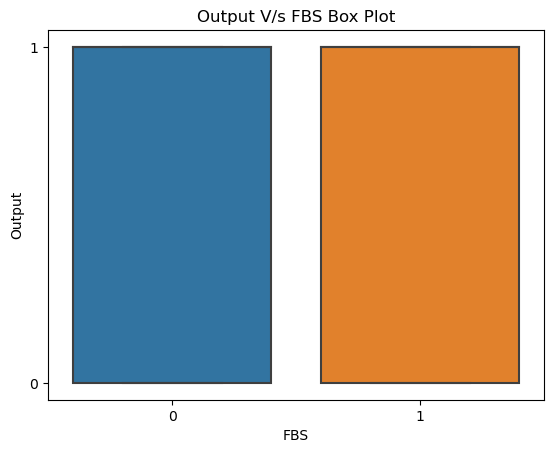

In [188]:
sns.boxplot(x='fbs', y='output', data=df)

# add x and y labels and a title
plt.xlabel('FBS')
plt.ylabel('Output')
plt.title('Output V/s FBS Box Plot')

plt.yticks([0,1])
plt.xticks([0,1])
# show the plot
plt.show()

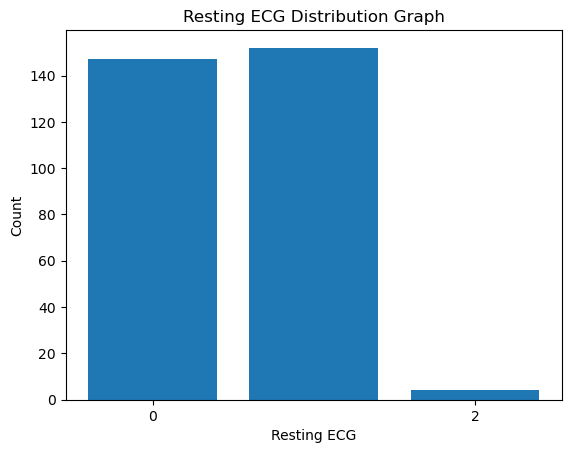

In [192]:
counts = df['restecg'].value_counts()

x_labels = counts.index
y_values = counts.values

plt.bar(x_labels, y_values)

plt.xlabel('Resting ECG')
plt.ylabel('Count')
plt.title('Resting ECG Distribution Graph')
plt.xticks([0,2])

plt.show()

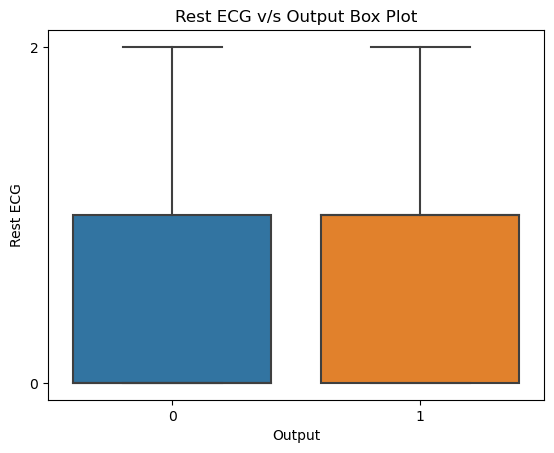

In [197]:
sns.boxplot(x='output', y='restecg', data=df)

# add x and y labels and a title
plt.xlabel('Output')
plt.ylabel('Rest ECG')
plt.title('Rest ECG v/s Output Box Plot')

plt.yticks([0,2])
plt.xticks([0,1])
# show the plot
plt.show()

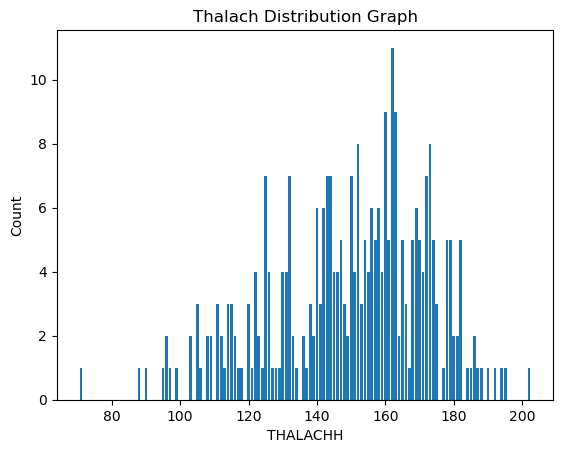

In [199]:
counts = df['thalachh'].value_counts()

x_labels = counts.index
y_values = counts.values

plt.bar(x_labels, y_values)

plt.xlabel('THALACHH')
plt.ylabel('Count')
plt.title('Thalach Distribution Graph')


plt.show()

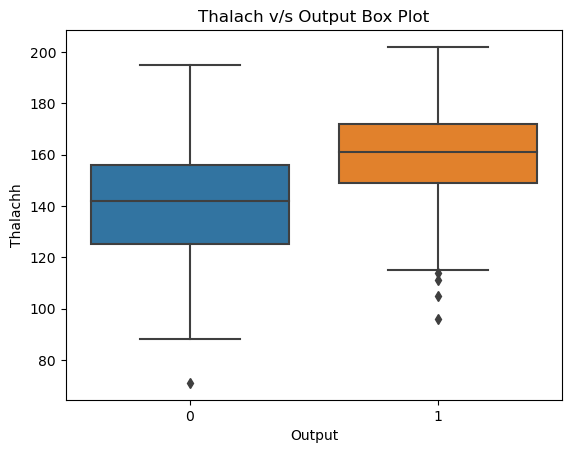

In [201]:
sns.boxplot(x='output', y='thalachh', data=df)

# add x and y labels and a title
plt.xlabel('Output')
plt.ylabel('Thalachh')
plt.title('Thalach v/s Output Box Plot')

# show the plot
plt.show()

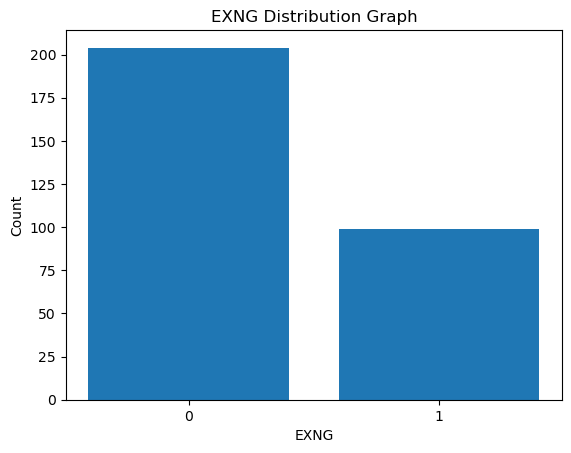

In [204]:
counts = df['exng'].value_counts()

x_labels = counts.index
y_values = counts.values

plt.bar(x_labels, y_values)

plt.xlabel('EXNG')
plt.ylabel('Count')
plt.title('EXNG Distribution Graph')

plt.xticks([0,1])

plt.show()

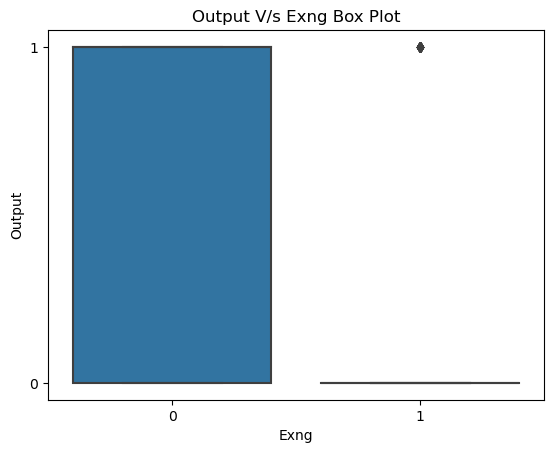

In [206]:
sns.boxplot(x='exng', y='output', data=df)

# add x and y labels and a title
plt.xlabel('Exng')
plt.ylabel('Output')
plt.title('Output V/s Exng Box Plot')

plt.yticks([0,1])
plt.yticks([0,1])
# show the plot
plt.show()

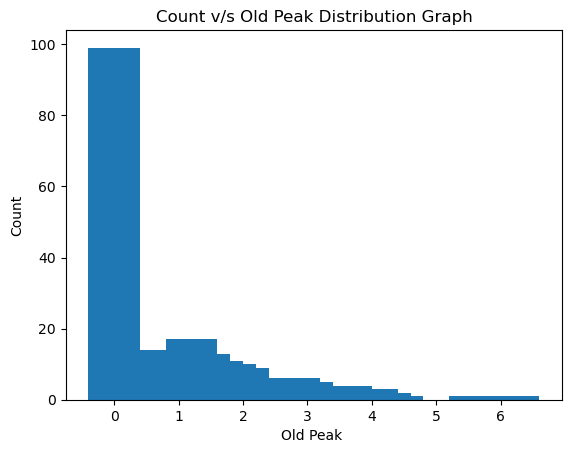

In [212]:
counts = df['oldpeak'].value_counts()

x_labels = counts.index
y_values = counts.values

plt.bar(x_labels, y_values)

plt.xlabel('Old Peak ')
plt.ylabel('Count')
plt.title('Count v/s Old Peak Distribution Graph')


plt.show()

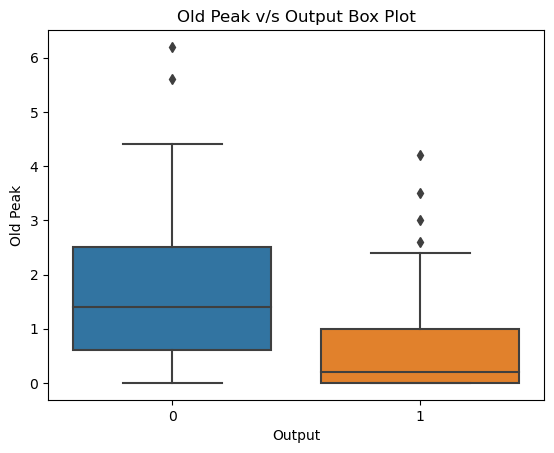

In [210]:
sns.boxplot(x='output', y='oldpeak', data=df)

# add x and y labels and a title
plt.xlabel('Output')
plt.ylabel('Old Peak')
plt.title('Old Peak v/s Output Box Plot')

# show the plot
plt.show()

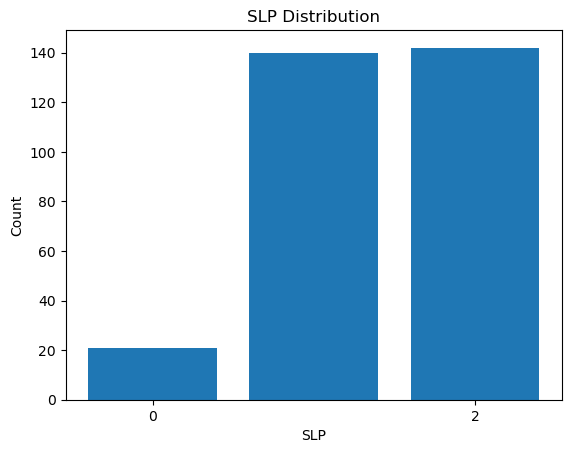

In [220]:
counts = df['slp'].value_counts()

x_labels = counts.index
y_values = counts.values

plt.bar(x_labels, y_values)

plt.xlabel('SLP')
plt.ylabel('Count')
plt.title('SLP Distribution')

plt.xticks([0,2])
plt.show()

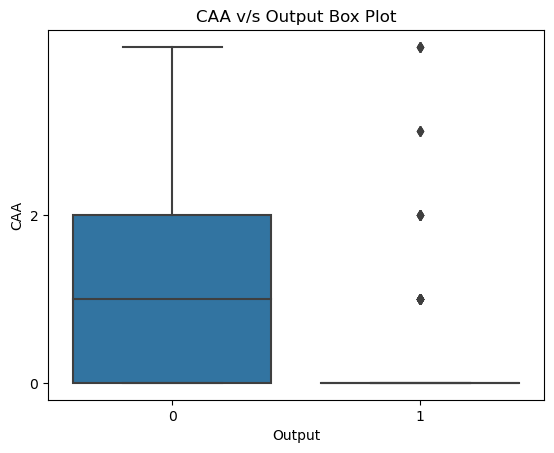

In [223]:
sns.boxplot(x='output', y='caa', data=df)

# add x and y labels and a title
plt.xlabel('Output')
plt.ylabel('CAA')
plt.title('CAA v/s Output Box Plot')
plt.yticks([0,2])
# show the plot
plt.show()

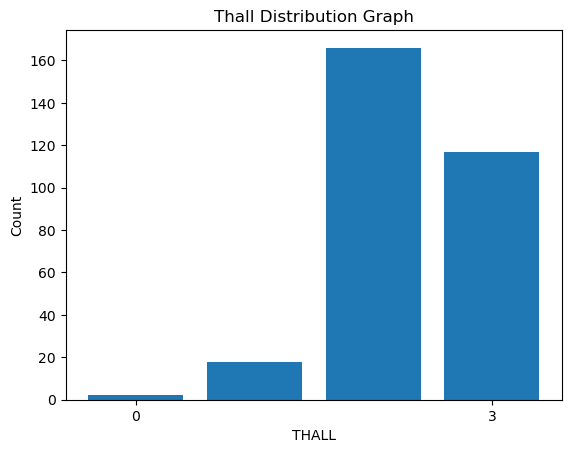

In [228]:
counts = df['thall'].value_counts()

x_labels = counts.index
y_values = counts.values

plt.bar(x_labels, y_values)

plt.xlabel('THALL')
plt.ylabel('Count')
plt.title('Thall Distribution Graph')
plt.xticks([0,3])

plt.show()

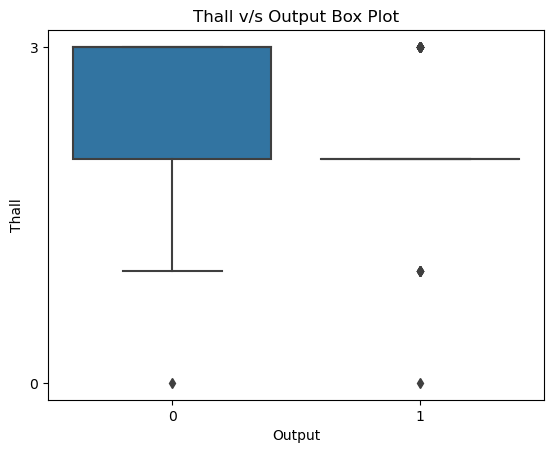

In [229]:
sns.boxplot(x='output', y='thall', data=df)

# add x and y labels and a title
plt.xlabel('Output')
plt.ylabel('Thall')
plt.title('Thall v/s Output Box Plot')
plt.yticks([0,3])
# show the plot
plt.show()

### Bivariate data analysis with scatter plot

In [230]:
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak","output"]

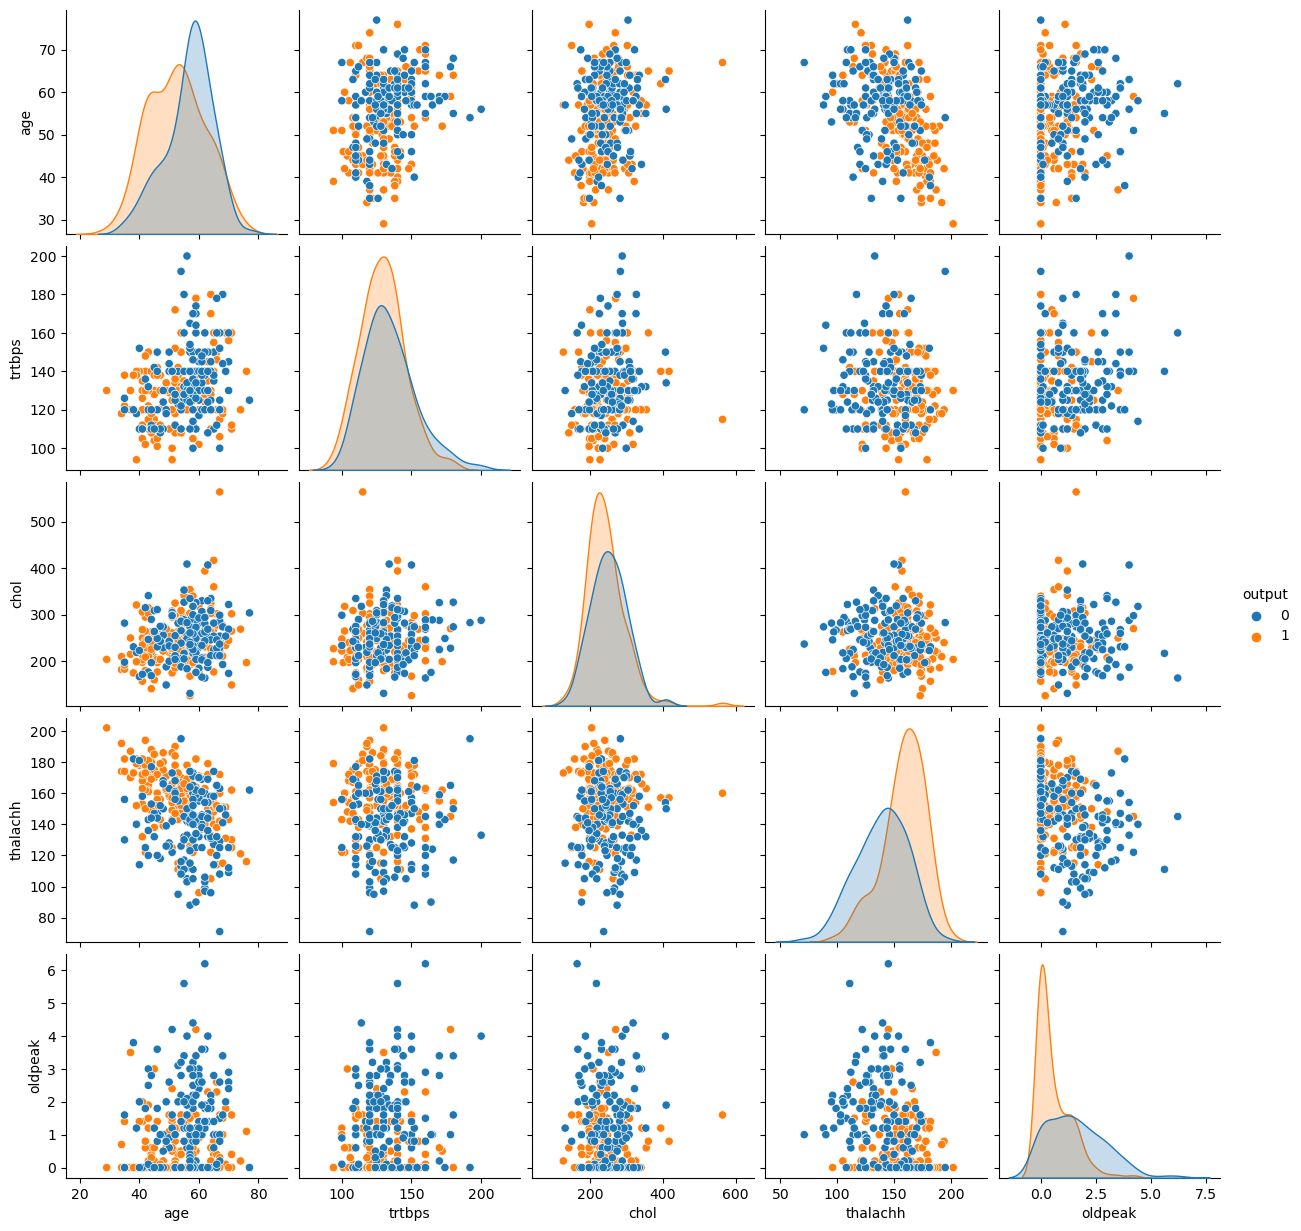

In [231]:
df_numeric = df.loc[:, numeric_list]
sns.pairplot(df_numeric, hue = "output", diag_kind = "kde")
plt.show()